In [1]:
import matplotlib.pyplot as plt
%matplotlib widget

import pandas as pd
from scipy import integrate

In [33]:
df = pd.read_csv("ax_test_drive_220801.csv", index_col=0)
df.lap = df.lap.astype(int)
number_of_laps = df.lap.max()

df = df.reset_index()

print(df)

         index         time  lap    INS_ax     INS_vx
0        22701    57.262282    1 -2.408677  15.450418
1        22702    57.265080    1 -2.493580  15.443852
2        22703    57.267213    1 -2.699690  15.436881
3        22704    57.270267    1 -2.844433  15.429581
4        22705    57.272274    1 -2.928234  15.422129
...        ...          ...  ...       ...        ...
750965  773666  2140.853208   67 -1.657653  17.332680
750966  773667  2140.856103   67 -1.565519  17.329159
750967  773668  2140.858186   67 -1.584281  17.325146
750968  773669  2140.861231   67 -1.615229  17.321484
750969  773670  2140.863265   67 -1.451486  17.318304

[750970 rows x 5 columns]


In [34]:
df["time"] = df.groupby("lap", group_keys=False).time.apply(lambda x: x - x.min())
print(df)

         index       time  lap    INS_ax     INS_vx
0        22701   0.000000    1 -2.408677  15.450418
1        22702   0.002798    1 -2.493580  15.443852
2        22703   0.004931    1 -2.699690  15.436881
3        22704   0.007985    1 -2.844433  15.429581
4        22705   0.009992    1 -2.928234  15.422129
...        ...        ...  ...       ...        ...
750965  773666  29.194823   67 -1.657653  17.332680
750966  773667  29.197718   67 -1.565519  17.329159
750967  773668  29.199801   67 -1.584281  17.325146
750968  773669  29.202846   67 -1.615229  17.321484
750969  773670  29.204880   67 -1.451486  17.318304

[750970 rows x 5 columns]


In [21]:
pivoted_df = df.copy()

for i in range(1, number_of_laps + 1):
    start_of_lap = pivoted_df.loc[pivoted_df.lap == i, "time"].min()
    pivoted_df.loc[pivoted_df.lap == i, "time"] -= start_of_lap

print(pivoted_df)

         index       time  lap    INS_ax     INS_vx
0        22701   0.000000    1 -2.408677  15.450418
1        22702   0.002798    1 -2.493580  15.443852
2        22703   0.004931    1 -2.699690  15.436881
3        22704   0.007985    1 -2.844433  15.429581
4        22705   0.009992    1 -2.928234  15.422129
...        ...        ...  ...       ...        ...
750965  773666  29.194823   67 -1.657653  17.332680
750966  773667  29.197718   67 -1.565519  17.329159
750967  773668  29.199801   67 -1.584281  17.325146
750968  773669  29.202846   67 -1.615229  17.321484
750969  773670  29.204880   67 -1.451486  17.318304

[750970 rows x 5 columns]


In [9]:
pivoted_df.lap = pivoted_df.lap.apply(lambda x: "lap_" + str(int(x)))

In [10]:
pivoted_df = pivoted_df.pivot(index="time", columns="lap",  values="INS_ax")
print(pivoted_df)

lap            lap_1     lap_10    lap_11    lap_12    lap_13     lap_14  \
time                                                                       
0.000000   -2.408677 -13.100289 -2.989287 -6.470455 -9.123634 -10.374823   
0.001366         NaN        NaN       NaN       NaN       NaN        NaN   
0.001943         NaN        NaN       NaN       NaN       NaN        NaN   
0.001992         NaN        NaN       NaN       NaN       NaN        NaN   
0.002007         NaN        NaN       NaN       NaN       NaN        NaN   
...              ...        ...       ...       ...       ...        ...   
209.404548       NaN        NaN       NaN       NaN       NaN        NaN   
209.406676       NaN        NaN       NaN       NaN       NaN        NaN   
209.409592       NaN        NaN       NaN       NaN       NaN        NaN   
209.411748       NaN        NaN       NaN       NaN       NaN        NaN   
209.414671       NaN        NaN       NaN       NaN       NaN        NaN   

lap        

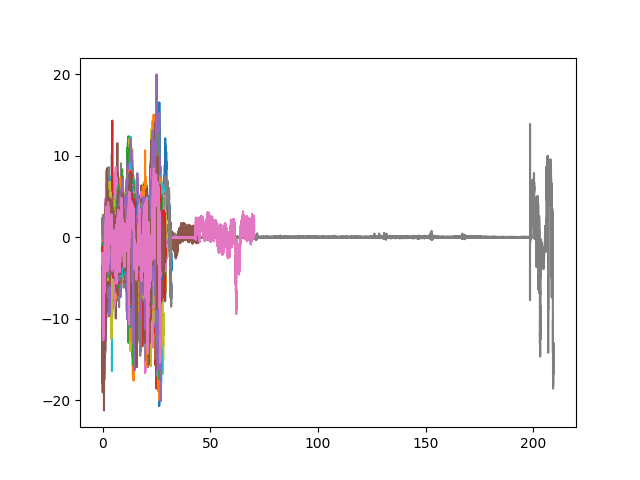

In [11]:
fig, ax = plt.subplots()

for lap in pivoted_df.columns:
    ax.plot(pivoted_df[lap].dropna())

In [41]:
dist_df = df.copy()

def calculate_distance(DF):
    DF["distance"] = integrate.cumulative_trapezoid(DF.INS_vx, x=DF.time, initial=0)
    return DF

dist_df = dist_df.groupby("lap", group_keys=False).apply(calculate_distance)

# dist_df["distance"] = 0
# for i in range(1, len(dist_df)):
#     # S = S0 + v0 * t + 0.5 * a * t**2
#     dist_df.loc[i, "distance"] = dist_df.loc[i - 1, "distance"] + dist_df.loc[i - 1, "INS_vx"] * (dist_df.loc[i, "time"] - dist_df.loc[i - 1, "time"]) + 0.5 * dist_df.loc[i - 1, "INS_ax"] * (dist_df.loc[i, "time"] - dist_df.loc[i - 1, "time"])**2

print(dist_df)

         index       time  lap    INS_ax     INS_vx    distance
0        22701   0.000000    1 -2.408677  15.450418    0.000000
1        22702   0.002798    1 -2.493580  15.443852    0.043221
2        22703   0.004931    1 -2.699690  15.436881    0.076155
3        22704   0.007985    1 -2.844433  15.429581    0.123288
4        22705   0.009992    1 -2.928234  15.422129    0.154248
...        ...        ...  ...       ...        ...         ...
750965  773666  29.194823   67 -1.657653  17.332680  333.810474
750966  773667  29.197718   67 -1.565519  17.329159  333.860647
750967  773668  29.199801   67 -1.584281  17.325146  333.896740
750968  773669  29.202846   67 -1.615229  17.321484  333.949489
750969  773670  29.204880   67 -1.451486  17.318304  333.984718

[750970 rows x 6 columns]


In [47]:
lap_metadata = {
    "lap": None,
    "lap_time": None,
    "lap_distance": None
}

lap_metadata["lap"] = dist_df.lap.unique()
lap_metadata["lap_time"] = dist_df.groupby("lap").time.apply(lambda x: x.max())
lap_metadata["lap_distance"] = dist_df.groupby("lap").distance.apply(lambda x: x.max())

lap_metadata_df = pd.DataFrame(lap_metadata)

print(lap_metadata_df)

     lap   lap_time  lap_distance
lap                              
1      1  31.922681    329.462201
2      2  28.479854    329.260411
3      3  28.219763    329.154221
4      4  27.451424    329.546391
5      5  26.861127    326.557547
..   ...        ...           ...
63    63  27.899303    333.613744
64    64  28.046920    333.232055
65    65  27.441223    328.387349
66    66  27.923722    332.775365
67    67  29.204880    333.984718

[67 rows x 3 columns]


In [48]:
median_lap_time = lap_metadata_df.lap_time.median()
lap_metadata_df = lap_metadata_df[lap_metadata_df.lap_time <= median_lap_time + 5]

print(lap_metadata_df)

     lap   lap_time  lap_distance
lap                              
1      1  31.922681    329.462201
2      2  28.479854    329.260411
3      3  28.219763    329.154221
4      4  27.451424    329.546391
5      5  26.861127    326.557547
..   ...        ...           ...
63    63  27.899303    333.613744
64    64  28.046920    333.232055
65    65  27.441223    328.387349
66    66  27.923722    332.775365
67    67  29.204880    333.984718

[64 rows x 3 columns]


In [49]:
fastest_lap = lap_metadata_df[lap_metadata_df.lap_time == lap_metadata_df.lap_time.min()]
print(fastest_lap)

     lap  lap_time  lap_distance
lap                             
32    32  25.30475    314.639728


In [105]:
fastest_lap_df = dist_df.loc[dist_df.lap == fastest_lap.lap.iloc[0]].reset_index().drop(columns=["level_0", "index"])
fastest_lap_df["max_brake"] = fastest_lap_df.INS_ax[(fastest_lap_df.INS_ax < -9.81) & (fastest_lap_df.INS_ax.shift(1) > fastest_lap_df.INS_ax) & (fastest_lap_df.INS_ax.shift(-1) > fastest_lap_df.INS_ax)]

print(fastest_lap_df)

           time  lap     INS_ax     INS_vx    distance  max_brake
0      0.000000   32 -13.081911  21.126032    0.000000        NaN
1      0.003077   32 -13.340016  21.093187    0.064954 -13.340016
2      0.005169   32 -12.978849  21.060982    0.109048        NaN
3      0.007876   32 -12.370606  21.031164    0.166019        NaN
4      0.010015   32 -12.300056  20.999290    0.210971        NaN
...         ...  ...        ...        ...         ...        ...
9165  25.294795   32 -12.824356  19.232635  314.448889        NaN
9166  25.297533   32 -12.780292  19.200434  314.501504        NaN
9167  25.299680   32 -12.705577  19.169090  314.542693        NaN
9168  25.302481   32 -12.581600  19.137526  314.596342        NaN
9169  25.304750   32 -12.753458  19.105316  314.639728        NaN

[9170 rows x 6 columns]


In [106]:
fastest_lap_max_brake_df = fastest_lap_df.dropna()
print(fastest_lap_max_brake_df)

print(fastest_lap_max_brake_df.max_brake.mean())

           time  lap     INS_ax     INS_vx    distance  max_brake
1      0.003077   32 -13.340016  21.093187    0.064954 -13.340016
5      0.013051   32 -12.740980  20.967283    0.274676 -12.740980
10     0.025234   32 -14.698838  20.833252    0.529432 -14.698838
17     0.043015   32 -14.980358  20.582106    0.897634 -14.980358
27     0.068158   32 -11.870021  20.280790    1.411168 -11.870021
...         ...  ...        ...        ...         ...        ...
9143  25.239504   32 -14.825336  19.966654  313.365444 -14.825336
9148  25.252268   32 -14.460868  19.789648  313.619192 -14.460868
9154  25.267476   32 -13.496964  19.590843  313.918618 -13.496964
9158  25.277463   32 -13.516437  19.459299  314.113601 -13.516437
9162  25.287463   32 -13.243645  19.329672  314.307529 -13.243645

[125 rows x 6 columns]
-12.122932914733887


In [107]:
lap10_df = dist_df.loc[dist_df.lap == 10].reset_index().drop(columns=["level_0", "index"])
lap10_df["max_brake"] = lap10_df.INS_ax[(lap10_df.INS_ax < -9.81) & (lap10_df.INS_ax.shift(1) > lap10_df.INS_ax) & (lap10_df.INS_ax.shift(-1) > lap10_df.INS_ax)]

print(lap10_df)

           time  lap     INS_ax     INS_vx    distance  max_brake
0      0.000000   10 -13.100289  19.739105    0.000000        NaN
1      0.002247   10 -13.464837  19.704674    0.044315 -13.464837
2      0.005031   10 -13.348041  19.672709    0.099128        NaN
3      0.007233   10 -13.165488  19.639107    0.142411        NaN
4      0.010007   10 -13.606840  19.604929    0.196842 -13.606840
...         ...  ...        ...        ...         ...        ...
9670  27.068281   10  -2.024301  21.649305  324.269353        NaN
9671  27.071119   10  -1.862750  21.644352  324.330787        NaN
9672  27.073214   10  -2.100101  21.638756  324.376126        NaN
9673  27.076176   10  -2.150073  21.633543  324.440212        NaN
9674  27.078401   10  -2.545743  21.625984  324.488338        NaN

[9675 rows x 6 columns]


In [108]:
lap10_max_brake_df = lap10_df.dropna()
print(lap10_max_brake_df)

print(lap10_max_brake_df.max_brake.mean())

           time  lap     INS_ax     INS_vx    distance  max_brake
1      0.002247   10 -13.464837  19.704674    0.044315 -13.464837
4      0.010007   10 -13.606840  19.604929    0.196842 -13.606840
7      0.017219   10 -13.061753  19.510363    0.337901 -13.061753
13     0.032299   10 -13.224895  19.319777    0.630746 -13.224895
18     0.045250   10 -13.300190  19.161867    0.879935 -13.300190
...         ...  ...        ...        ...         ...        ...
7614  21.236204   10 -12.488630   8.764647  253.535707 -12.488630
7617  21.243538   10 -10.507850   8.676291  253.599667 -10.507850
7622  21.255609   10 -11.112099   8.543536  253.703601 -11.112099
7639  21.298561   10 -10.658079   8.156224  254.062339 -10.658079
7656  21.340905   10 -10.091475   7.799598  254.400487 -10.091475

[100 rows x 6 columns]
-12.863023529052734


### Idé

* Integrer for å få distanse på x-aksen
* Finn den raskeste runden
* Bruk den raskeste runden til å finne ut om sjåføren bremser og akselererer for sent eller for tidlig